<a href="https://colab.research.google.com/github/hariharankpz/Playground/blob/master/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test_Secnario2.xls to Test_Secnario2.xls


In [ ]:
import pandas as pd
import numpy as np
# !pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 13.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
df = pd.read_excel("Test_Secnario2.xls")

In [ ]:
df.head()
customer_id_df = df.copy()

In [ ]:
df.columns

Index(['CUSTOMER_NUMBER', 'GENDER', 'AGE', 'NATIONALITY', 'MARITAL_STATUS',
       'PRODUCT_CODE', 'PURCHASE_DATE', 'TRANS_NUM', 'POINT_TYPE', 'POINTS',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [ ]:
df.drop(["Unnamed: 10", "Unnamed: 11", "Unnamed: 12"],axis=1,inplace=True)

In [ ]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>1 ]
#mean - sum of all data points/number of all datapoints
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

AGE 0.1667  % missing values
MARITAL_STATUS 0.5556  % missing values


In [ ]:
df["AGE"].fillna(df["AGE"].mean(), inplace = True)
df["MARITAL_STATUS"].fillna("MISSING", inplace = True)

In [ ]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
df.drop(["CUSTOMER_NUMBER","TRANS_NUM","PURCHASE_DATE"],axis=1,inplace=True)

df.head()

,GENDER,AGE,NATIONALITY,MARITAL_STATUS,PRODUCT_CODE,POINT_TYPE,POINTS
0,F,113.0,IN,MISSING,VOYCC,BASE_POINTS,11
1,M,30.0,IN,M,SA,OFFER_POINTS,23
2,M,30.0,IN,M,SA,BASE_POINTS,26
3,M,30.0,IN,M,SA,OFFER_POINTS,23
4,M,30.0,IN,M,SA,BONUS_POINTS,32


In [ ]:

from sklearn import preprocessing
customers_norm = df.copy()
scaler = preprocessing.MinMaxScaler()
customers_norm[['AGE','POINTS']] = scaler.fit_transform(customers_norm[['AGE','POINTS']])

In [ ]:
# df.iloc[:,[0,2,3,4,5]] #categorical columns

In [ ]:
customers_norm.head()

,GENDER,AGE,NATIONALITY,MARITAL_STATUS,PRODUCT_CODE,POINT_TYPE,POINTS
0,F,1.000000,IN,MISSING,VOYCC,BASE_POINTS,0.000000
1,M,0.117021,IN,M,SA,OFFER_POINTS,0.010591
2,M,0.117021,IN,M,SA,BASE_POINTS,0.013239
3,M,0.117021,IN,M,SA,OFFER_POINTS,0.010591
4,M,0.117021,IN,M,SA,BONUS_POINTS,0.018535


In [ ]:
# !pip install kmodes
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(customers_norm, categorical=[0,2,3,4,5])
#join data with labels 
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((df,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)


In [ ]:
labeledCustomers.head(100)

,GENDER,AGE,NATIONALITY,MARITAL_STATUS,PRODUCT_CODE,POINT_TYPE,POINTS,labels
0,F,113.000000,IN,MISSING,VOYCC,BASE_POINTS,11,0
1,M,30.000000,IN,M,SA,OFFER_POINTS,23,1
2,M,30.000000,IN,M,SA,BASE_POINTS,26,1
3,M,30.000000,IN,M,SA,OFFER_POINTS,23,1
4,M,30.000000,IN,M,SA,BONUS_POINTS,32,1
5,M,30.000000,IN,M,SA,LIFEMILES_POINTS,12,1
6,M,30.000000,IN,M,SA,BASE_POINTS,112,1
7,M,19.000000,AF,MISSING,SA,OFFER_POINTS,34,2
8,M,19.000000,AF,MISSING,SA,OFFER_POINTS,112,2
9,M,19.000000,AF,MISSING,SA,BASE_POINTS,43,2


In [ ]:
clusters

array([0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=uint16)

In [ ]:
# customer_id_df

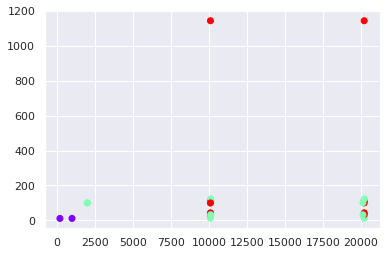

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = clusters 
plt.scatter(customer_id_df.iloc[:,0],customer_id_df["POINTS"],c=data_with_clusters['Clusters'],cmap='rainbow')
